#Speech Processing Lab - Week 2

Name: S U Swakath 

Roll number: 180020036


Aim

*   To understand the difference between stationary and non-stationary signals.
*   To get a feel about the non stationary nature of speech signals.
*   To understand the limitations of Fourier transform in case of non-stationary signals.


#Problem A

Generation of a singletone sine wave and its spectrum.

a. Generate a 10 Hz sine wave sampled at 1000 Hz sampling frequency
and for a duration of 1 sec for this problem.

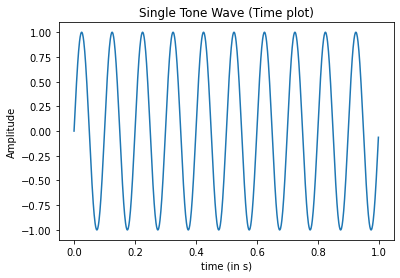

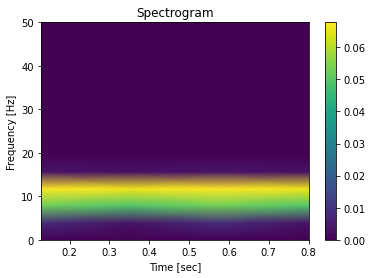

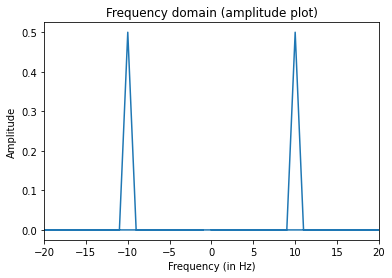

In [ ]:
#Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal

#Defining program variables
f = 10 #sine wave frequency in Hz
fs = 1000 #sampling frequency in Hz
t_max = 1 #length of sine wave in seconds
t = np.arange(0,t_max,1/fs) #time vector for sine wave computation
totalSamples = t_max*fs; #total samples in the wave

#Computing Singletone Wave 
singletoneWave = np.sin(2*np.pi*f*t); #singletone wave

wave_fft_a = fft(singletoneWave)/totalSamples #computing fft of the wave
freqs = fftfreq(totalSamples, 1 / fs) #frequency vector for the plot

f_a, t_a, Sst = signal.spectrogram(singletoneWave, fs) #spectrogram computation

#Time domain plot
plt.figure()
plt.plot(t,singletoneWave)
plt.title("Single Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

#Spectrogram
plt.figure()
plt.pcolormesh(t_a, f_a, Sst, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,50))
plt.colorbar()
plt.show()

#Frequency domain plot (FFT)
plt.figure()
plt.title("Frequency domain (amplitude plot)")
plt.plot(freqs, np.abs(wave_fft_a))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-20,20))
plt.show()

#Problem B

a. Generate a multitone sine wave composed of 10, 50 and 100 Hz
frequency components. Use a sampling frequency of 1000Hz and a
wave of duration 1 sec for the problem.

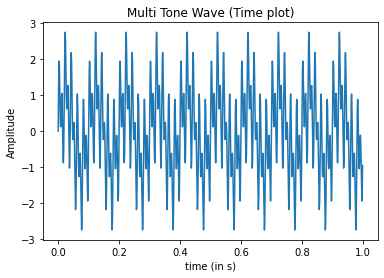

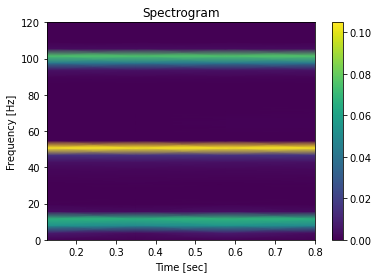

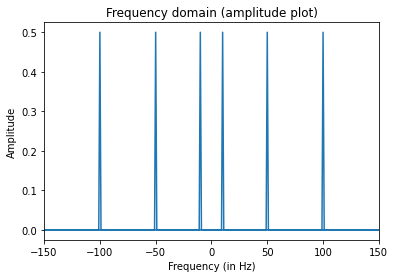

In [ ]:
#Defining program variables
#frequency components of multitone sine wave in Hz
f1 = 10
f2 = 50
f3 = 100 
fs = 1000 #sampling frequency in Hz
t_max = 1 #length of sine wave in seconds
t = np.arange(0,t_max,1/fs) #time vector for sine wave computation
totalSamples = t_max*fs; #total samples in the wave

#Computing multitone Wave 
multitoneWave = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t); 

wave_fft_b = fft(multitoneWave)/totalSamples #computing fft of the wave
freqs = fftfreq(totalSamples, 1 / fs) #frequency vector for the plot

f_b, t_b, Smt = signal.spectrogram(multitoneWave, fs) #spectrogram computation

#Time domain plot
plt.figure()
plt.plot(t,multitoneWave)
plt.title("Multi Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

#Spectrogram
plt.figure()
plt.pcolormesh(t_b, f_b, Smt, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,120))
plt.colorbar()
plt.show()

#Frequency domain plot (FFT)
plt.figure()
plt.title("Frequency domain (amplitude plot)")
plt.plot(freqs, np.abs(wave_fft_b))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()

#Problem C

Generation of a non-stationary multitone sine wave and its spectrum.

a. Generate a non-stationary multitone sine wave made of different
combinations of 10, 50 and 100 Hz components. Example combination:

*   Sin(2𝛱*10*t) ; 0 < t < 0.2 sec
*   Sin(2𝛱*10*t) + Sin(2𝛱*50*t) ; 0.2 < t < 0.5 sec
*   Sin(2𝛱*10*t) + Sin(2𝛱*50*t) + Sin(2𝛱*100*t) ; 0.5 < t < 1 sec

b. Generate the frequency spectrum taking the whole signal at once and
taking each stationary part of the signal individually. Record your
observations on the spectrum obtained by using the whole signal, the
stationary parts individually and the limitations of Fourier Transform
when we consider the whole non-stationary speech signal.

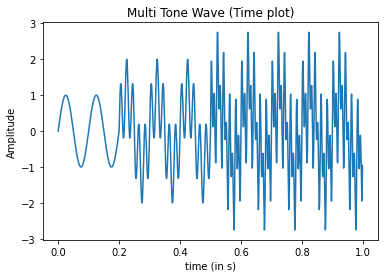

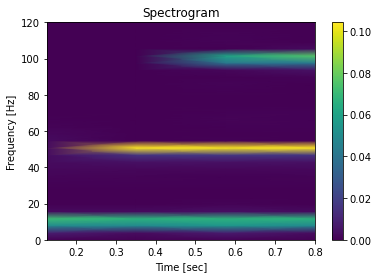

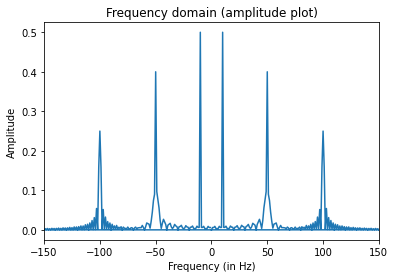

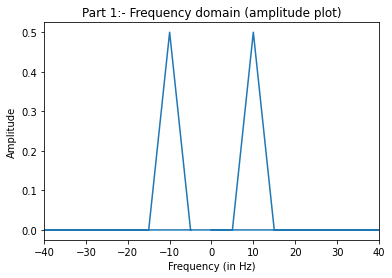

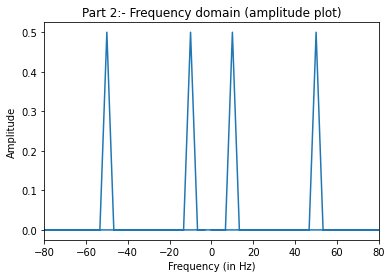

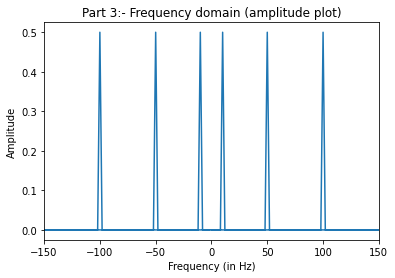

In [ ]:
#Defining program variables
#frequency components of multitone sine wave in Hz
f1 = 10
f2 = 50
f3 = 100 
fs = 1000 #sampling frequency in Hz
t_max = 1 #length of sine wave in seconds
t = np.arange(0,t_max,1/fs) #time vector for sine wave computation
totalSamples = t_max*fs; #total samples in the wave

#subsamples of time vector
t1 = t[0:int (0.2*fs)] # Samples corresponding to 0<t<0.2
t2 = t[int (0.2*fs) :int (0.5*fs)] # Samples corresponding to 0.2<t<0.5
t3 = t[int (0.5*fs) :fs] # Samples corresponding to 0.5<t<1

#Computing Non-Stationary Wave 
part1 = np.sin(2*np.pi*f1*t1)
part2 = np.sin(2*np.pi*f1*t2)+np.sin(2*np.pi*f2*t2)
part3 = np.sin(2*np.pi*f1*t3)+np.sin(2*np.pi*f2*t3)+np.sin(2*np.pi*f3*t3)
nonStationaryWave = np.array([])
nonStationaryWave = np.hstack((part1,part2,part3))

wave_fft_c = fft(nonStationaryWave)/totalSamples #computing fft of the wave
freqs = fftfreq(totalSamples, 1 / fs) #frequency vector for the plot

f_c, t_c, Snst = signal.spectrogram(nonStationaryWave, fs) #spectrogram computation

#computing individual part fft
#part1
fft_1 = fft(part1)/(totalSamples*0.2) 
freqs1 = fftfreq(int (totalSamples*0.2), 1 / fs) 
#part2
fft_2 = fft(part2)/(totalSamples*0.3) 
freqs2 = fftfreq(int (totalSamples*0.3), 1 / fs) 
#part3
fft_3 = fft(part3)/(totalSamples*0.5) 
freqs3 = fftfreq(int (totalSamples*0.5), 1 / fs) 

#Time domain plot
plt.figure()
plt.plot(t,nonStationaryWave)
plt.title("Multi Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

#Spectrogram
plt.figure()
plt.pcolormesh(t_c, f_c, Snst, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,120))
plt.colorbar()
plt.show()

#Frequency domain plot (FFT)
plt.figure()
plt.title("Frequency domain (amplitude plot)")
plt.plot(freqs, np.abs(wave_fft_c))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()


plt.figure()
plt.title("Part 1:- Frequency domain (amplitude plot)")
plt.plot(freqs1, np.abs(fft_1))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-40,40))
plt.show()

plt.figure()
plt.title("Part 2:- Frequency domain (amplitude plot)")
plt.plot(freqs2, np.abs(fft_2))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-80,80))
plt.show()

plt.figure()
plt.title("Part 3:- Frequency domain (amplitude plot)")
plt.plot(freqs3, np.abs(fft_3))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()

#Problem D

Plotting waveform and spectra of speech signal.

a. Record the phrase ‘Sakshaat Speech Processing’ and save it in a .wav
file. Now, (re)sample the speech signal to 8kHz and plot the speech
signal.


b. Compute and plot the spectrum of the different categories of sounds
present in the recorded speech file. Inspect the spectral properties of
sounds belonging to different categories, and comment on the nature
of the whole speech signal.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


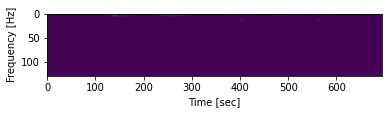

In [ ]:
# Imports
from scipy.io import wavfile
import scipy.signal as sps

# Your sampling rate in Hz
fs = 80000 

# Read file
path = "/content/gdrive/MyDrive/Sem6/Speech Lab/Week2/week2audio.wav"
sampling_rate, data = wavfile.read(path)

from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(path)
data = (samples[:,0])# + samples[:,1] )/2
frequencies, times, spectrogram = signal.spectrogram(data, sample_rate)
plt.figure()
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()